# Football Player Transfer Analysis
## Summary
This report provides a detailed analysis of high-value football player transfers based on the dataset football_players.csv. The analysis focuses on understanding trends in transfer fees, player positions, club dynamics, and national contributions to the football transfer market. The insights derived aim to assist stakeholders in making informed decisions regarding player acquisitions, strategic planning, and market positioning within the competitive football industry.



## Dataset Overview
The dataset comprises 54 entries featuring critical fields:

* Rank: Rank of the player transfer.
* Origin: Country of origin of the player.
* Player: Name of the player.
* From(Country): Country from which the player transferred.
* From(Club): Club from which the player transferred.
* To(Country): Country to which the player transferred.
* To(Club): Club to which the player transferred.
* Position: Playing position of the player.
* Fee(€ mln): Transfer fee in million euros.
* Fee(£ mln): Transfer fee in million pounds.
* Year: Year in which the transfer occurred.
* Born: Birth year of the player.


## Data Cleaning and Preparation

The dataset underwent several cleaning and preparation steps to ensure accuracy and consistency:

* Column Renaming: Standardized column names for clarity and consistency.

* Handling Missing Values: Checked for and handled missing values appropriately, ensuring data integrity.

* Data Type Conversion: Converted data types (e.g., fees) to numeric for analysis.

* Normalization: Ensured consistent formats (e.g., lowercase, uppercase) for categorical data like player positions and club names.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

In [2]:
font = fm.FontProperties(fname='Staatliches-Regular.ttf')

In [3]:
data = pd.read_csv("football_players.csv")

In [4]:
data.head()

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,£198,2017,1992
1,2,France,Kylian Mbappé,France,Monaco,France,Paris Saint-Germain,Forward,180.0,£163,2018,1998
2,3,Brazil,Philippe Coutinho,England,Liverpool,Spain,Barcelona,Midfielder,145.0,£105,2018,1992
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999
4,5,France,Antoine Griezmann,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,£107,2019,1991


### Analysis

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:Green;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
1. The average of player trade price each position
</h1>
</div>

### Football has 4 main positions
* Forward

* Midfielder

* Defender

* Goalkeeper

In [5]:
data.columns = ['Rank', 'Origin', 'Player', 'From_Country', 'From_Club',
       'To_Country', 'To_Club', 'Position', 'Fee_€ mln','Fee_£ mln','Year', 'Born']

data['Position'] = data['Position'].apply(lambda x : x if x!='Striker' else 'Forward')
position = pd.DataFrame(data.groupby('Position')['Fee_€ mln'].mean())
position = position.sort_values('Fee_€ mln', axis=0,ascending=True)
each_position_count = data['Position'].value_counts()

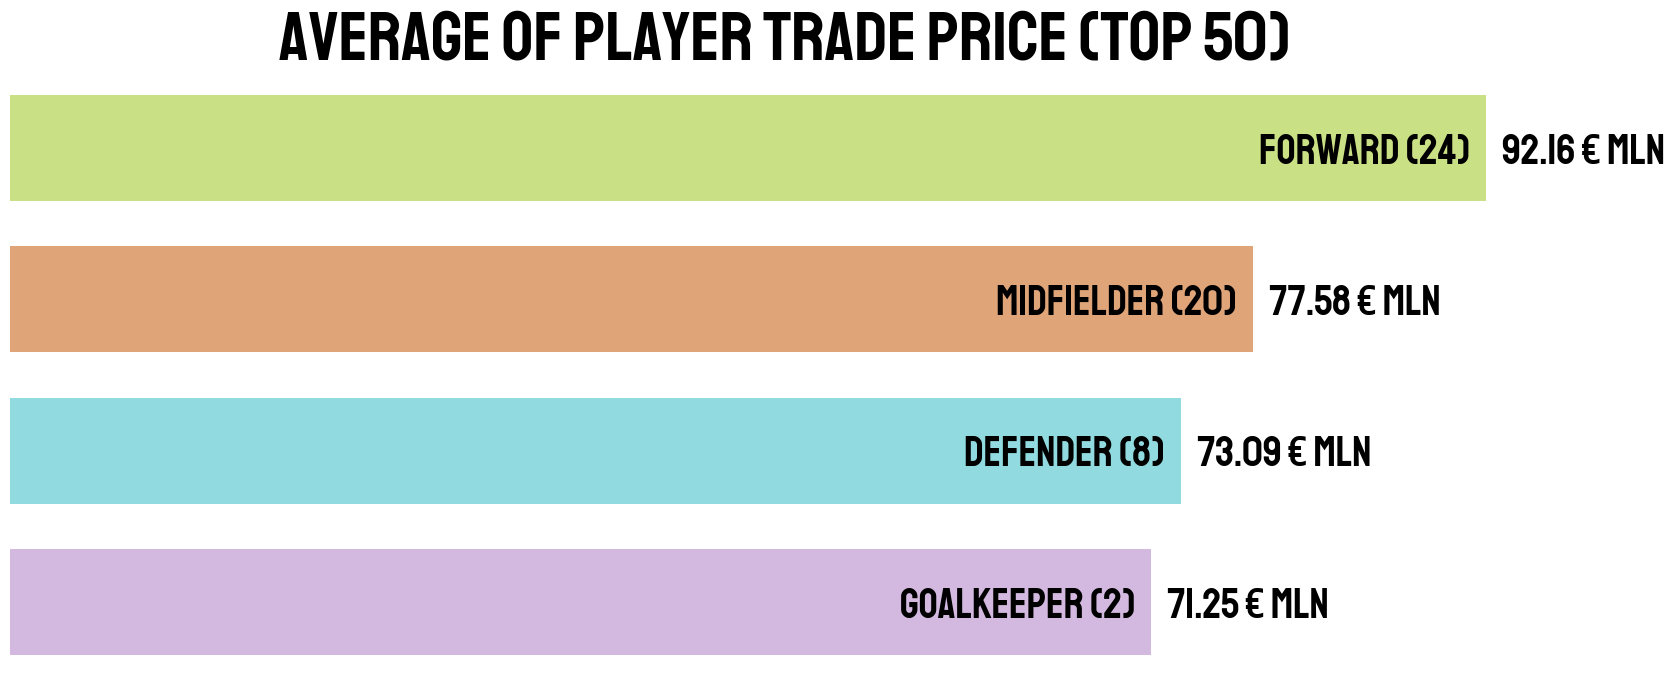

In [6]:
fig = plt.figure(figsize=(20,8))
plt.barh(width=position['Fee_€ mln'], y=position.index,height=0.7, color = ['#D3B9DF','#90DAE0','#E0A479','#CAE084'])
for i in range(len(position)):
    plt.text(s = f"{position.index[i]} ({each_position_count[i*-1 +3]})", x=round(position['Fee_€ mln'][i]-1,2), y=i ,font = font, fontsize=30,va='center',ha='right')
    plt.text(s = f"{round(position['Fee_€ mln'][i],2)} € mln", x=round(position['Fee_€ mln'][i]+1,2), y=i ,font = font, fontsize=30,va='center',ha='left')

plt.title("average of player trade price (Top 50)",font=font, fontsize=50)
plt.axis('off')
plt.show()

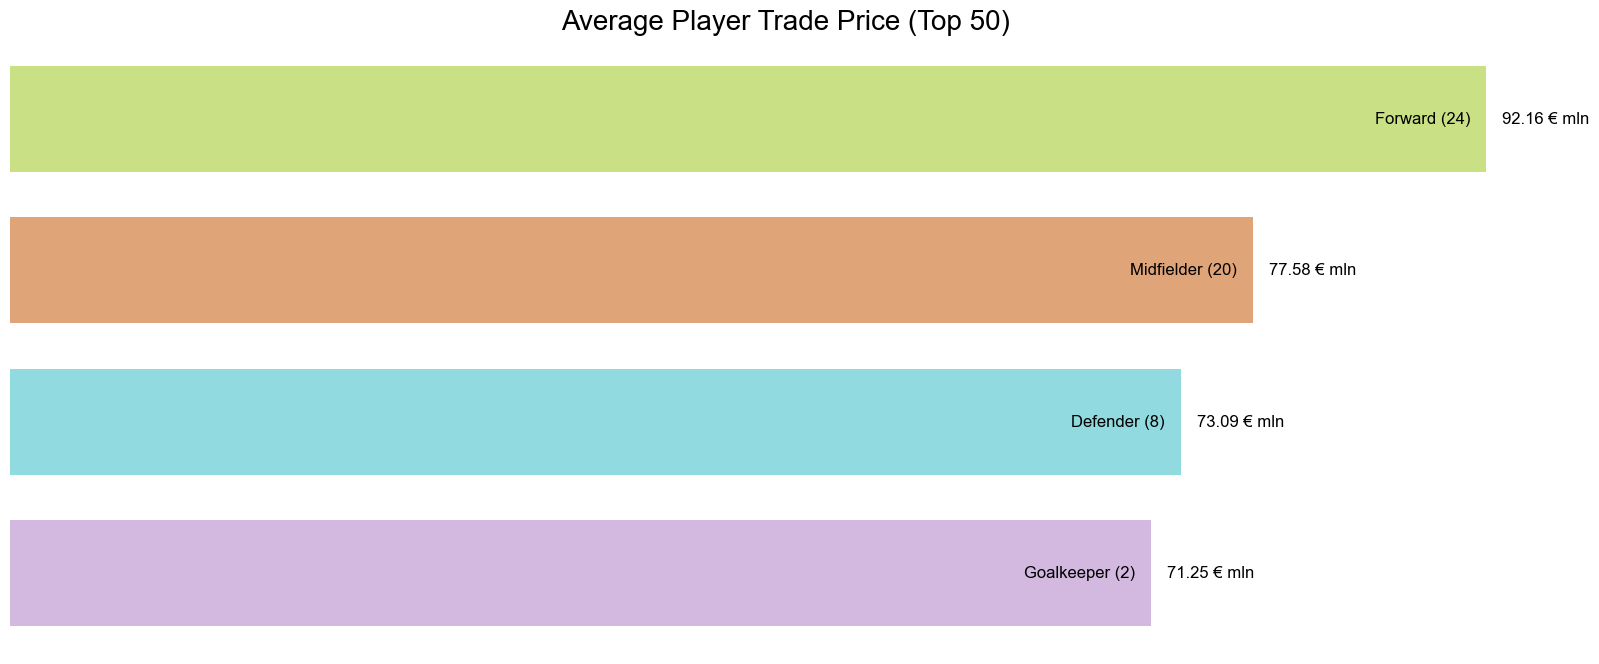

In [7]:
# Ensure the DataFrame 'data' has the expected columns before renaming
expected_columns = ['Rank', 'Origin', 'Player', 'From_Country', 'From_Club',
                    'To_Country', 'To_Club', 'Position', 'Fee_€ mln', 'Fee_£ mln', 'Year', 'Born']
if list(data.columns) == expected_columns:
    data.columns = expected_columns

# Replace 'Striker' with 'Forward' in the 'Position' column
data['Position'] = data['Position'].replace('Striker', 'Forward')

# Calculate the mean fee for each position
position_avg_fee = data.groupby('Position')['Fee_€ mln'].mean().sort_values()

# Count the occurrences of each position
position_counts = data['Position'].value_counts()

# Create the plot
fig, ax = plt.subplots(figsize=(20, 8))
colors = ['#D3B9DF', '#90DAE0', '#E0A479', '#CAE084']
bars = ax.barh(position_avg_fee.index, position_avg_fee, color=colors, height=0.7)

# Add text annotations to the bars
for i, bar in enumerate(bars):
    position = position_avg_fee.index[i]
    count = position_counts[position]
    avg_fee = position_avg_fee[position]
    ax.text(bar.get_width() - 1, bar.get_y() + bar.get_height() / 2,
            f"{position} ({count})", va='center', ha='right', fontsize=12, fontdict={'fontname': 'Arial'})
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
            f"{avg_fee:.2f} € mln", va='center', ha='left', fontsize=12, fontdict={'fontname': 'Arial'})

# Set the title and remove axes for a cleaner look
ax.set_title("Average Player Trade Price (Top 50)", fontsize=20, fontdict={'fontname': 'Arial'})
ax.axis('off')

# Show the plot
plt.show()


### If you see this chart, you can feel forward position is the most price position and Goalkeeper position is the lowest position. But it's only 2 players

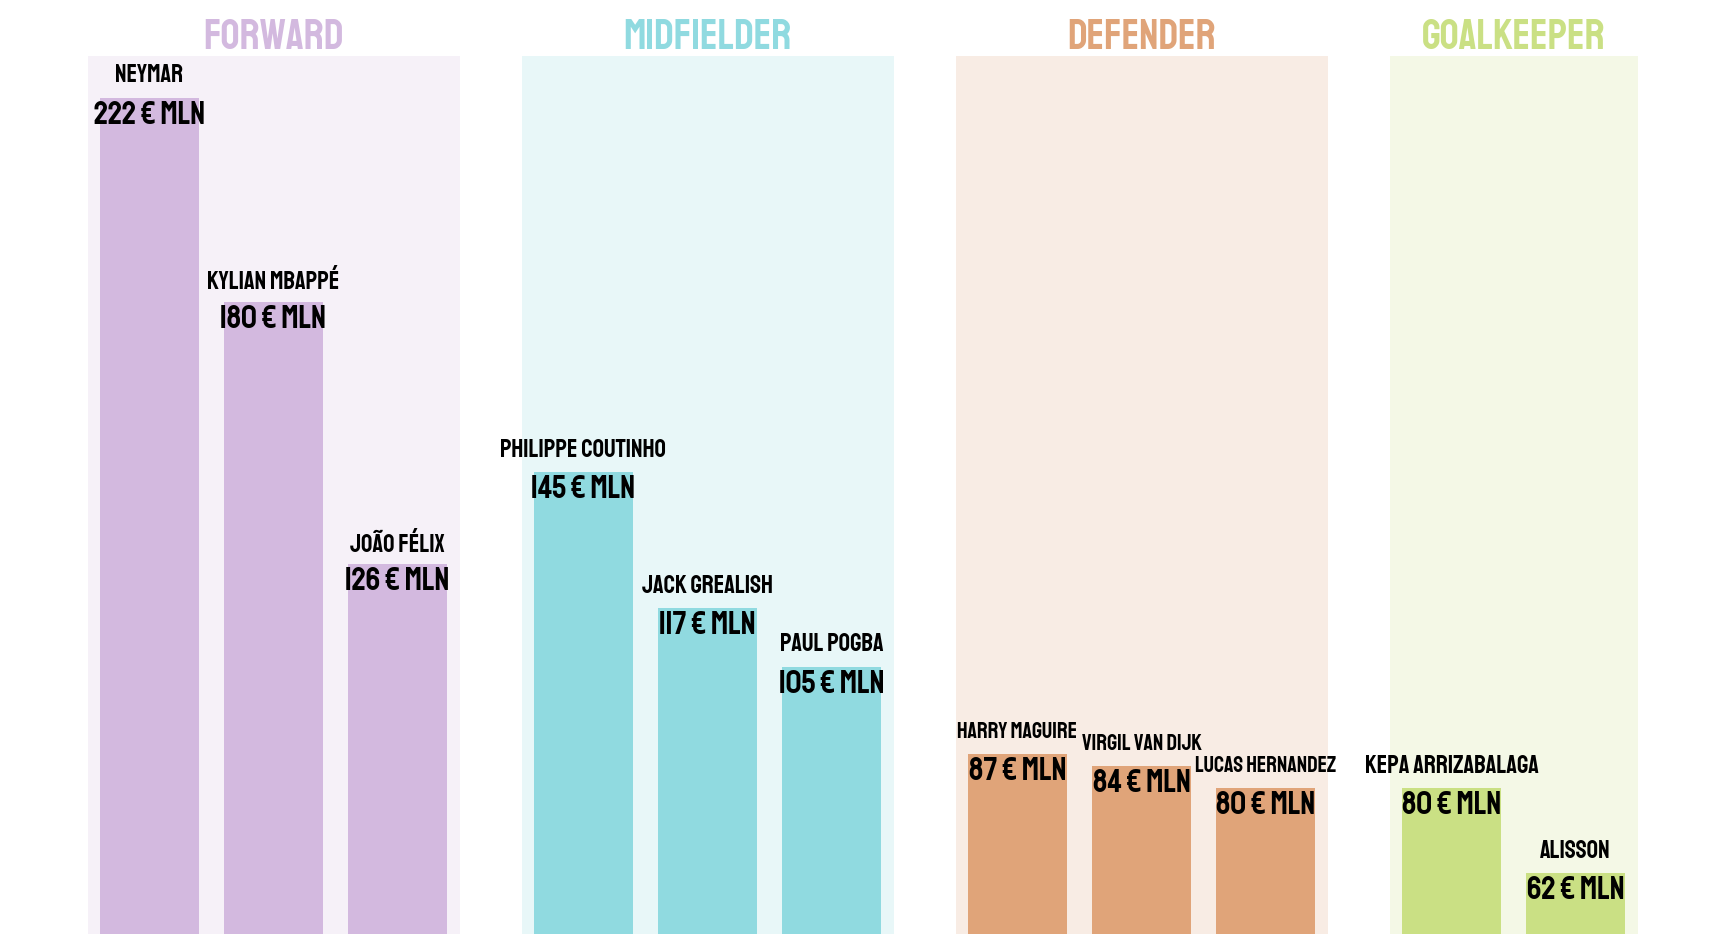

In [8]:
forward = data[data['Position'] == 'Forward'].head(3).reset_index(drop=True)
mid = data[data['Position'] == 'Midfielder'].head(3).reset_index(drop=True)
defend = data[data['Position'] == 'Defender'].head(3).reset_index(drop=True)
goalkeeper = data[data['Position'] == 'Goalkeeper'].head(3).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(22,12), facecolor="w")
plt.bar(x= [0,1,2], height=forward['Fee_€ mln'], color ='#D3B9DF')
plt.bar(x= [3.5,4.5,5.5], height=mid['Fee_€ mln'], color='#90DAE0')
plt.bar(x= [7,8,9], height=defend['Fee_€ mln'], color ='#E0A479')
plt.bar(x= [10.5,11.5], height=goalkeeper['Fee_€ mln'], color ='#CAE084')

ax.axvspan(xmin = -0.5,xmax= 2.5, ymax= 0.95, fc='#D3B9DF', alpha=0.2)
ax.axvspan(xmin = 3,xmax= 6, ymax= 0.95, fc='#90DAE0', alpha=0.2)
ax.axvspan(xmin = 6.5,xmax= 9.5, ymax= 0.95, fc='#E0A479', alpha=0.2)
ax.axvspan(xmin = 10,xmax= 12, ymax= 0.95, fc='#CAE084', alpha=0.2)

for i in range(len(forward)):
    plt.text(s = forward.loc[i,'Player'], x= i, y= forward.loc[i,'Fee_€ mln']+5, va='center', ha='center',font=font, fontsize= 18)
    plt.text(s = f"{round(forward.loc[i,'Fee_€ mln'])} € mln", x= i, y= forward.loc[i,'Fee_€ mln']-3, va='center', ha='center',font=font, fontsize= 23)
    
    plt.text(s = mid.loc[i,'Player'], x= i+3.5, y= mid.loc[i,'Fee_€ mln']+5, va='center', ha='center',font=font, fontsize= 18)
    plt.text(s = f"{round(mid.loc[i,'Fee_€ mln'])} € mln", x= i+3.5, y= mid.loc[i,'Fee_€ mln']-3, va='center', ha='center',font=font, fontsize= 23)
    
    plt.text(s = defend.loc[i,'Player'], x= i+7, y= defend.loc[i,'Fee_€ mln']+5, va='center', ha='center',font=font, fontsize= 16)
    plt.text(s = f"{round(defend.loc[i,'Fee_€ mln'])} € mln", x= i+7, y= defend.loc[i,'Fee_€ mln']-3, va='center', ha='center',font=font, fontsize= 23)
    
    if i ==2:
        break
    plt.text(s = goalkeeper.loc[i,'Player'], x= i+10.5, y= goalkeeper.loc[i,'Fee_€ mln']+5, va='center', ha='center',font=font, fontsize= 18)
    plt.text(s = f"{round(goalkeeper.loc[i,'Fee_€ mln'])} € mln", x= i+10.5, y= goalkeeper.loc[i,'Fee_€ mln']-3, va='center', ha='center',font=font, fontsize= 23)

plt.text(s = "forward", x= 1, y= 235, va='center', ha='center',font=font, fontsize= 30,color ='#D3B9DF')
plt.text(s = "Midfielder", x= 4.5, y= 235, va='center', ha='center',font=font, fontsize= 30, color='#90DAE0')
plt.text(s = "Defender", x= 8, y= 235, va='center', ha='center',font=font, fontsize= 30, color ='#E0A479')
plt.text(s = "Goalkeeper", x= 11, y= 235, va='center', ha='center',font=font, fontsize= 30, color ='#CAE084')

plt.ylim(50,240)
plt.axis('off')
plt.show()

### You can feel that each position's price gap
### Look the forward position. Neymar records the best expensive price.

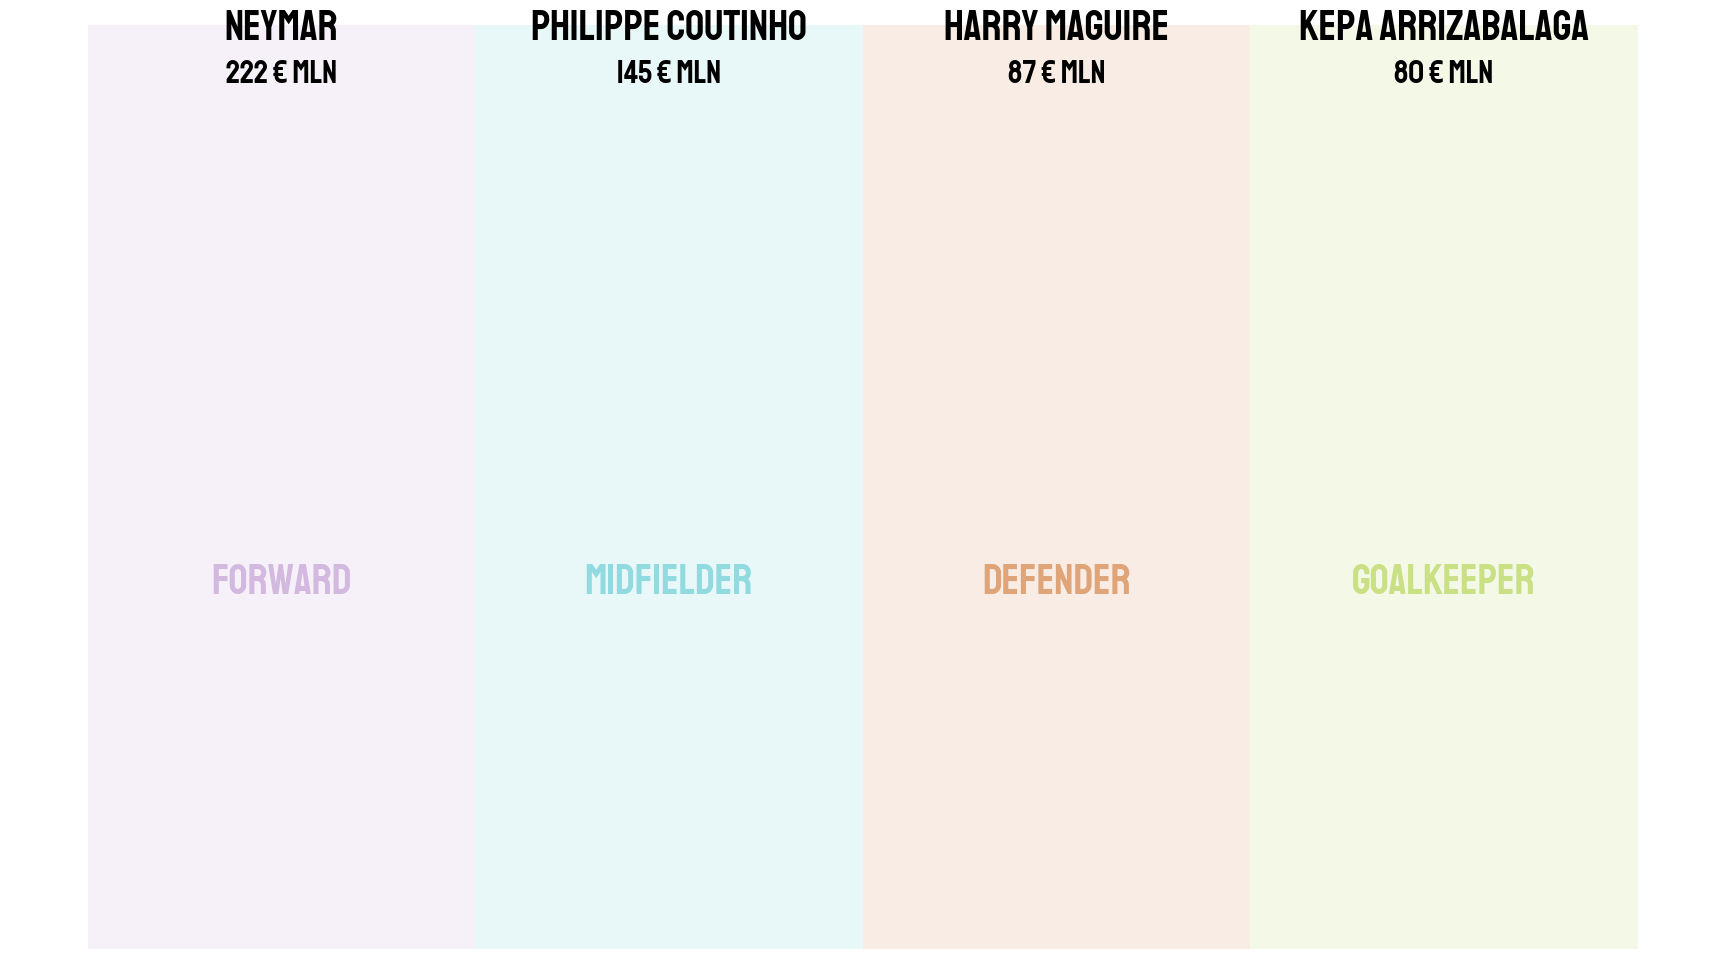

In [9]:
def make_img(img,zoom, x, y):
    img = mpimg.imread(img)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x,y),frameon=False)
    ax.add_artist(ab)

forward = data[data['Position'] == 'Forward'].head(3).reset_index(drop=True)
mid = data[data['Position'] == 'Midfielder'].head(3).reset_index(drop=True)
defend = data[data['Position'] == 'Defender'].head(3).reset_index(drop=True)
goalkeeper = data[data['Position'] == 'Goalkeeper'].head(3).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(22,12), facecolor="w")
ax.axvspan(xmin = 0,xmax= 4, ymax= 1, fc='#D3B9DF', alpha=0.2)
ax.axvspan(xmin = 4,xmax= 8, ymax= 1, fc='#90DAE0', alpha=0.2)
ax.axvspan(xmin = 8,xmax= 12, ymax= 1, fc='#E0A479', alpha=0.2)
ax.axvspan(xmin = 12,xmax= 16, ymax= 1, fc='#CAE084', alpha=0.2)

plt.text(s = forward.loc[0,'Player'], x= 2, y= 1, va='center', ha='center',font=font, fontsize= 30)
plt.text(s = mid.loc[0,'Player'], x= 6, y=  1, va='center', ha='center',font=font, fontsize= 30)
plt.text(s = defend.loc[0,'Player'], x= 10, y=  1, va='center', ha='center',font=font, fontsize= 30)
plt.text(s = goalkeeper.loc[0,'Player'], x= 14, y=  1, va='center', ha='center',font=font, fontsize= 30)

plt.text(s = f"{round(forward.loc[0,'Fee_€ mln'])} € mln", x= 2, y= 0.95, va='center', ha='center',font=font, fontsize= 23)
plt.text(s = f"{round(mid.loc[0,'Fee_€ mln'])} € mln", x= 6, y= 0.95, va='center', ha='center',font=font, fontsize= 23)
plt.text(s = f"{round(defend.loc[0,'Fee_€ mln'])} € mln", x= 10, y= 0.95, va='center', ha='center',font=font, fontsize= 23)
plt.text(s = f"{round(goalkeeper.loc[0,'Fee_€ mln'])} € mln", x= 14, y= 0.95, va='center', ha='center',font=font, fontsize= 23)



plt.text(s = "forward", x= 2, y= 0.4, va='center', ha='center',font=font, fontsize= 30,color ='#D3B9DF')
plt.text(s = "Midfielder", x= 6, y= 0.4, va='center', ha='center',font=font, fontsize= 30, color='#90DAE0')
plt.text(s = "Defender", x= 10, y= 0.4, va='center', ha='center',font=font, fontsize= 30, color ='#E0A479')
plt.text(s = "Goalkeeper", x= 14, y= 0.4, va='center', ha='center',font=font, fontsize= 30, color ='#CAE084')

plt.axis('off')
plt.show()

### This is each position's most expensive players, you can feel forward and midfileder position are more expensive than defender and goalkeeper

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:green;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
2.Regions of club transfers?
</h1>
</div>

### Now, Recognize the club that trade the player most

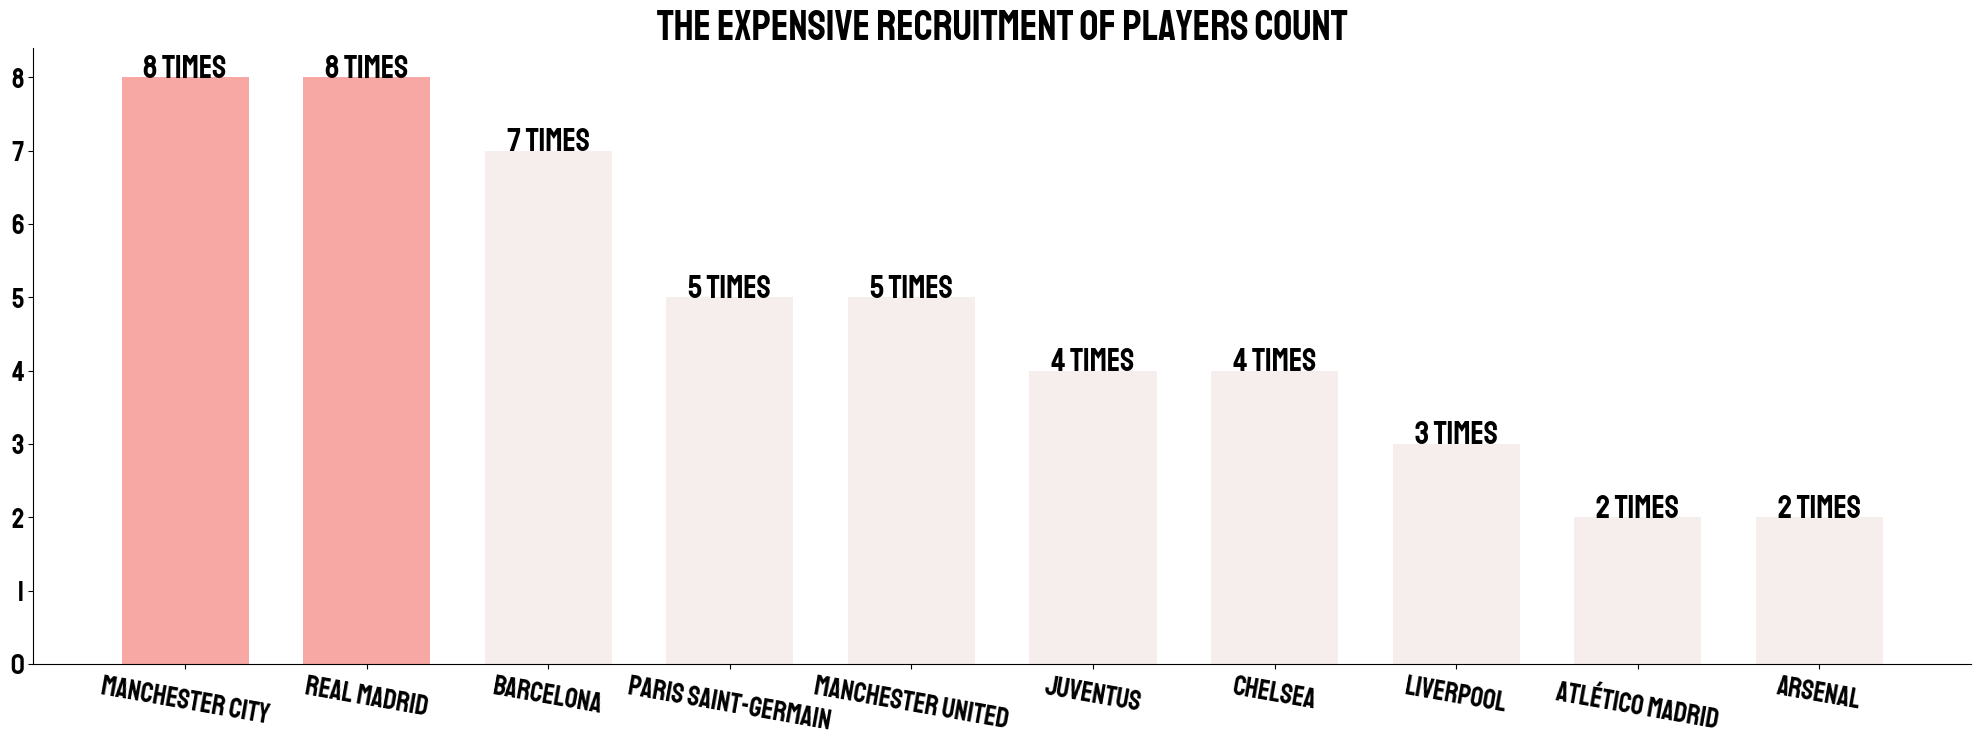

In [10]:
many_club_all = data['To_Club'].value_counts()
many_club = pd.DataFrame(many_club_all[:10]).reset_index()
many_club.columns = ['team', 'count']

color = ['#F7A8A5', '#F7A8A5']
color += ['#F5EEED']*8
plt.figure(figsize=(25,8))
plt.bar(x=many_club['team'], height = many_club['count'],width=0.7,color =color)
plt.xticks(font=font,fontsize=20,rotation=350)
plt.yticks(font=font,fontsize=20)

for i in range(len(many_club)):
    plt.text(s= f"{many_club.loc[i,'count']} times", x= i, y=many_club.loc[i,'count'],va='bottom', ha='center',font=font, fontsize=23)
    
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("The expensive Recruitment of players count", font=font, fontsize=30)
plt.show()

#### If you see the bar chart, Real Madrid and Manchester city are the most trade clubs.

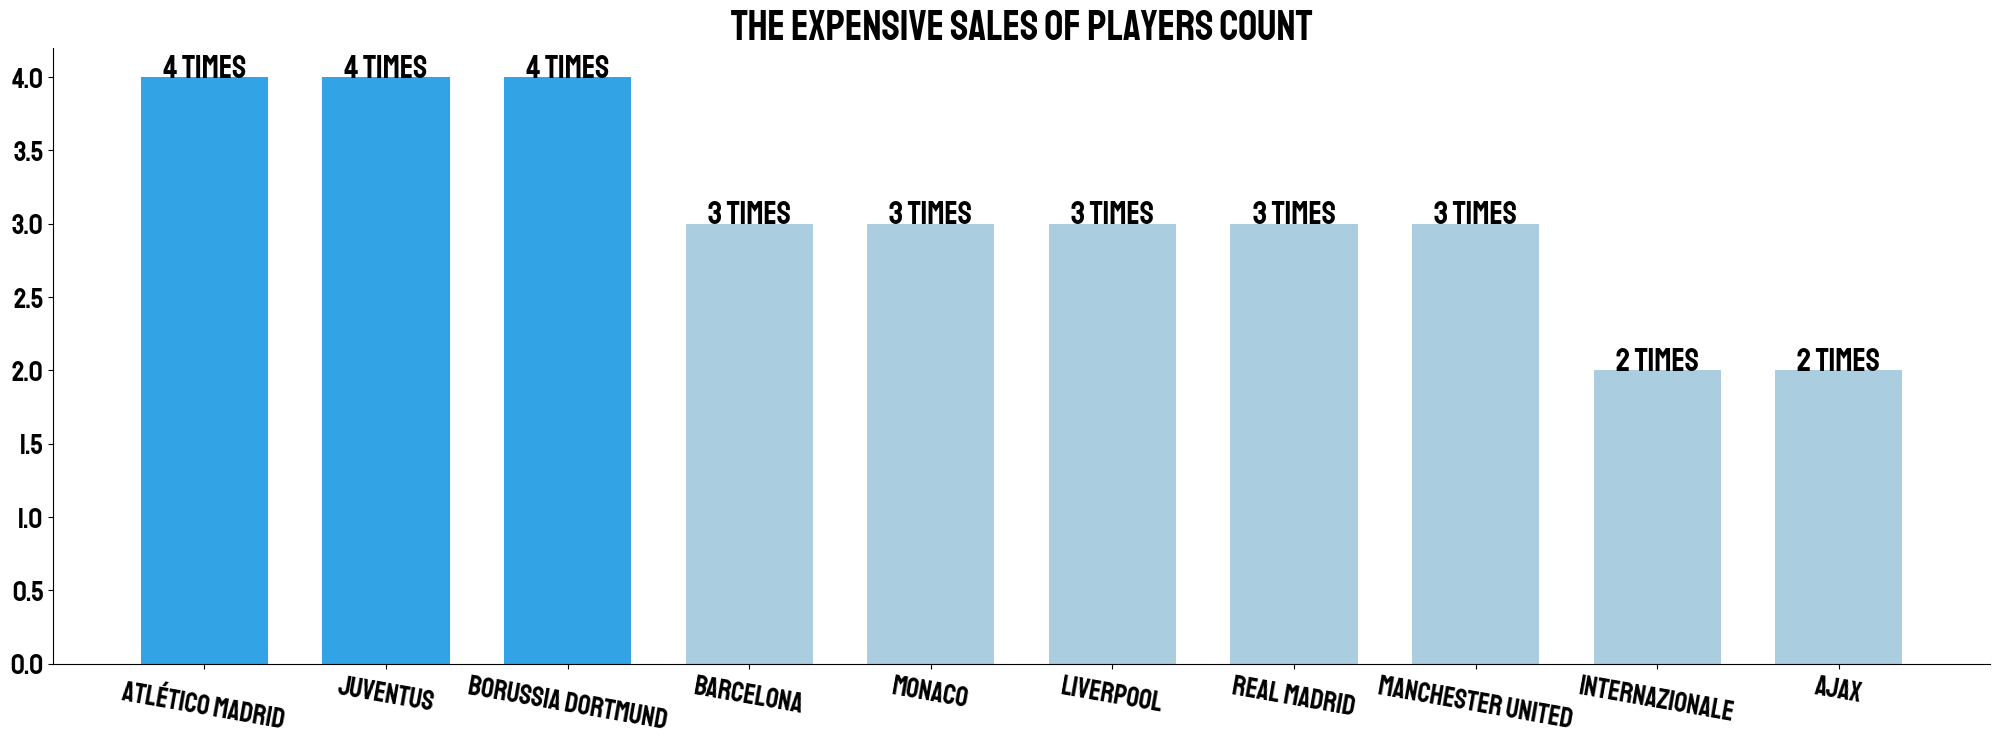

In [11]:
many_club_sale_all = data['From_Club'].value_counts()
many_club_sale = pd.DataFrame(many_club_sale_all[:10]).reset_index()
many_club_sale.columns = ['team', 'count']

color = ['#32A4E6']*3
color += ['#ABCDE0']*7
plt.figure(figsize=(25,8))
plt.bar(x=many_club_sale['team'], height = many_club_sale['count'],width=0.7,color =color)
plt.xticks(font=font,fontsize=20,rotation=350)
plt.yticks(font=font,fontsize=20)

for i in range(len(many_club_sale)):
    plt.text(s= f"{many_club_sale.loc[i,'count']} times", x= i, y=many_club_sale.loc[i,'count'],va='bottom', ha='center',font=font, fontsize=23)
    
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("The expensive sales of players count", font=font, fontsize=30)
plt.show()

### And, Atletico madrid and borussia dortmund, juventus record the most sale club

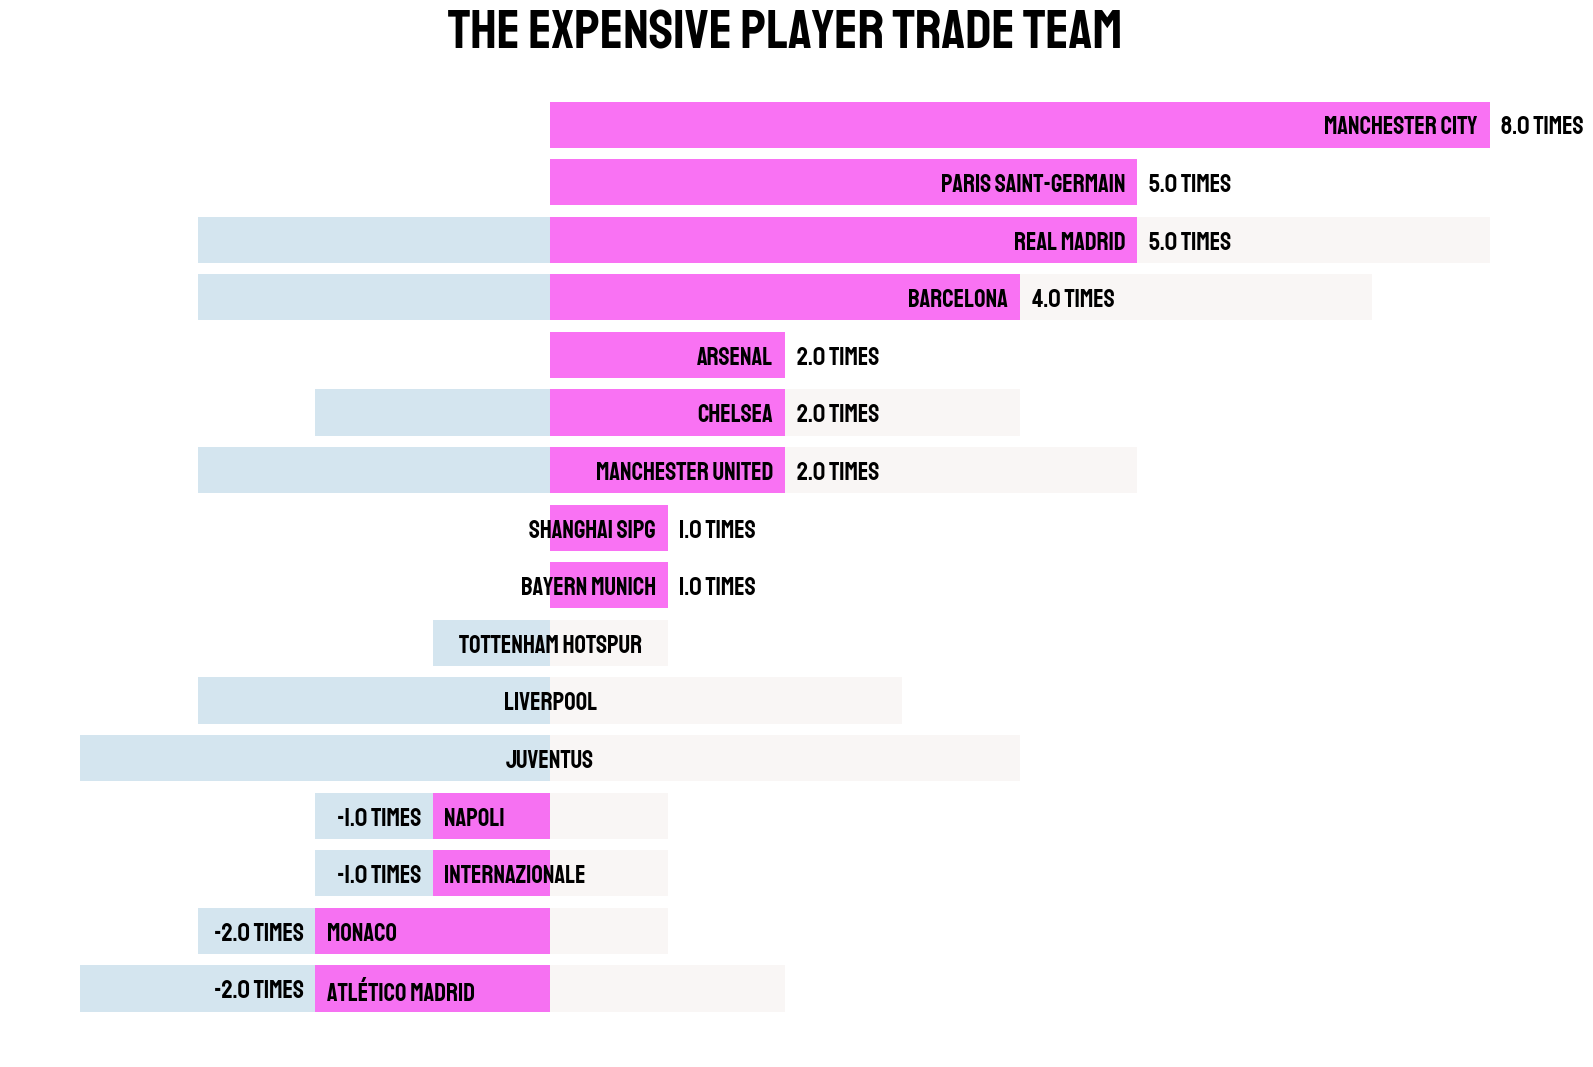

In [12]:
many_club_all = pd.DataFrame(many_club_all).reset_index()
many_club_sale_all = pd.DataFrame(many_club_sale_all).reset_index()
tmp = many_club_all.set_index('index').join(many_club_sale_all.set_index('index'))
tmp = tmp.fillna(0)
tmp['sum'] = tmp['To_Club'] -tmp['From_Club']
tmp = tmp.reset_index()
tmp = tmp.sort_values(by='sum').reset_index(drop=True)

fig, axes = plt.subplots(figsize=(20,13), facecolor="w")
plt.barh(width=tmp['To_Club'], y = tmp['index'],alpha= 0.5, color = '#F5EEED')
plt.barh(width=tmp['From_Club']*-1, y = tmp['index'], alpha=0.5, color = '#ABCDE0')
plt.barh(width=tmp['sum'], y = tmp['index'], alpha=0.9, color ='#FA64F3')

for i in range(len(tmp)):
    if tmp.loc[i,'sum'] > 0:
        plt.text(s=f"{tmp.loc[i,'index']}", x=tmp.loc[i,'sum']-0.1, y=i,font=font, fontsize=18,va='center',ha='right')
        plt.text(s=f"{tmp.loc[i,'sum']} times", x=tmp.loc[i,'sum']+0.1, y=i,font=font, fontsize=18,va='center',ha='left')

    elif tmp.loc[i,'sum'] < 0:
        plt.text(s=f"{tmp.loc[i,'index']}", x=tmp.loc[i,'sum']+0.1, y=i,font=font, fontsize=18,va='center',ha='left')
        plt.text(s=f"{tmp.loc[i,'sum']} times", x=tmp.loc[i,'sum']-0.1, y=i,font=font, fontsize=18,va='center',ha='right')

    else:
        plt.text(s=f"{tmp.loc[i,'index']}", x=tmp.loc[i,'sum'], y=i,font=font, fontsize=18,va='center',ha='center')

plt.title('The expensive player trade team', font=font, fontsize=40)
plt.axis('off')
plt.show()

### Surprisingly, the Manchester City only recruit 8times.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
3. Where is that expensive player's country?
</h1>
</div>

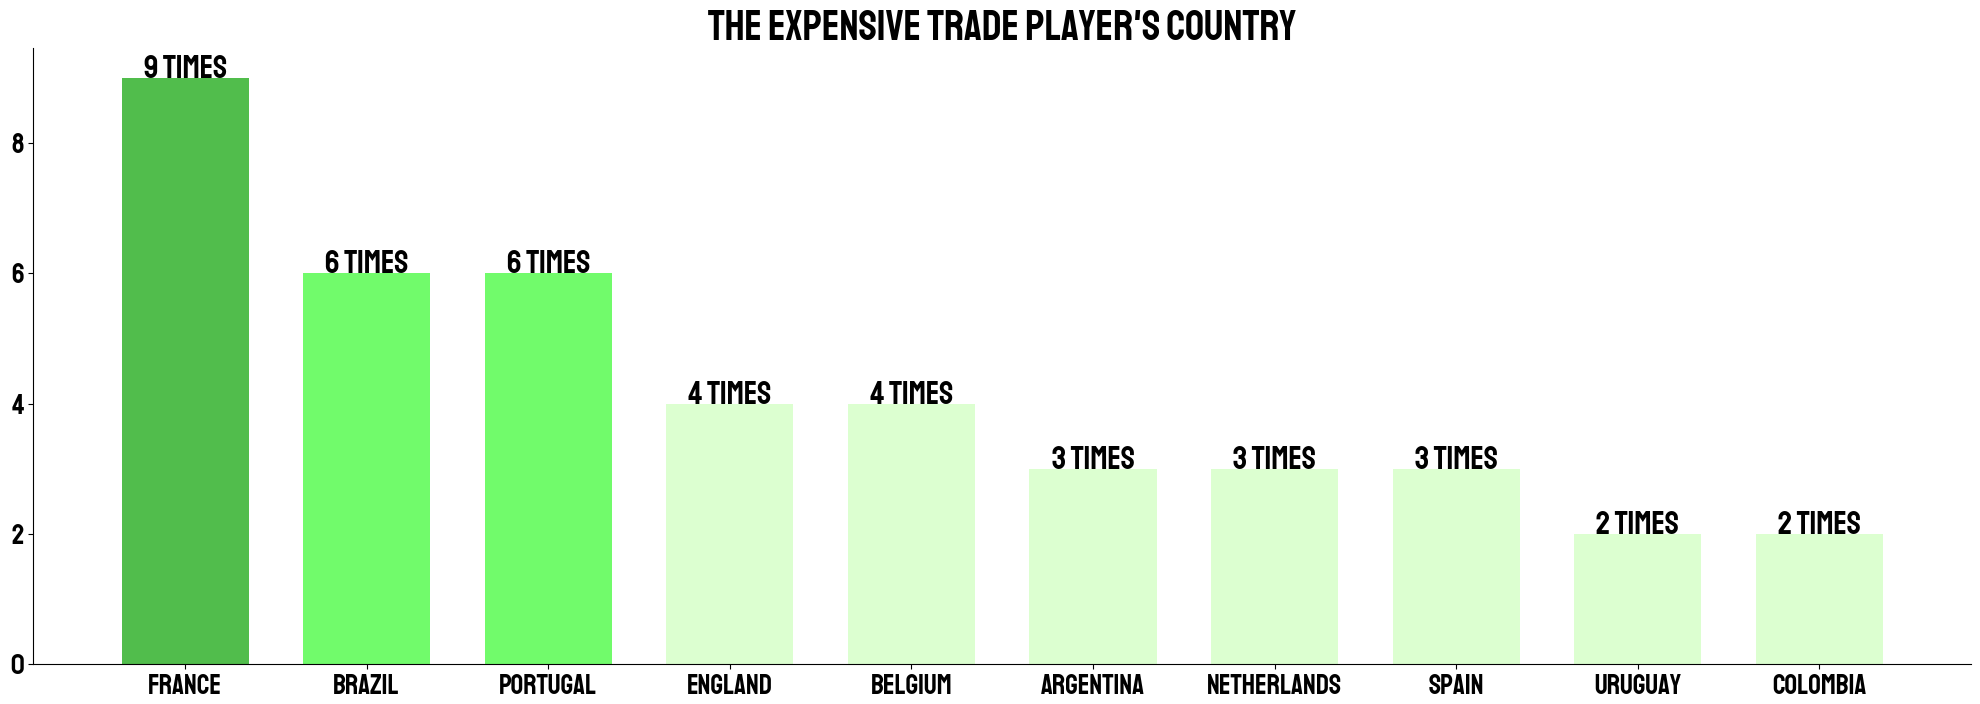

In [13]:
country = data['Origin'].value_counts()
country = pd.DataFrame(country[country > 1]).reset_index()
country.columns= ['country','count']
color = ['#26AD1F', '#4EFA46','#4EFA46']
color += ['#D4FFC5']*7
plt.figure(figsize=(25,8))
plt.bar(x=country['country'], height = country['count'],width=0.7,color =color,alpha=0.8)
plt.xticks(font=font,fontsize=20)
plt.yticks(font=font,fontsize=20)

for i in range(len(country)):
    plt.text(s= f"{country.loc[i,'count']} times", x= i, y=country.loc[i,'count'],va='bottom', ha='center',font=font, fontsize=23)
    
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("The expensive trade player's country", font=font, fontsize=30)
plt.show()

### France is the country that the most trade player's country

/var/folders/qh/fs_v24xj7f1d0hvqpphddmsh0000gn/T/ipykernel_72481/425048243.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


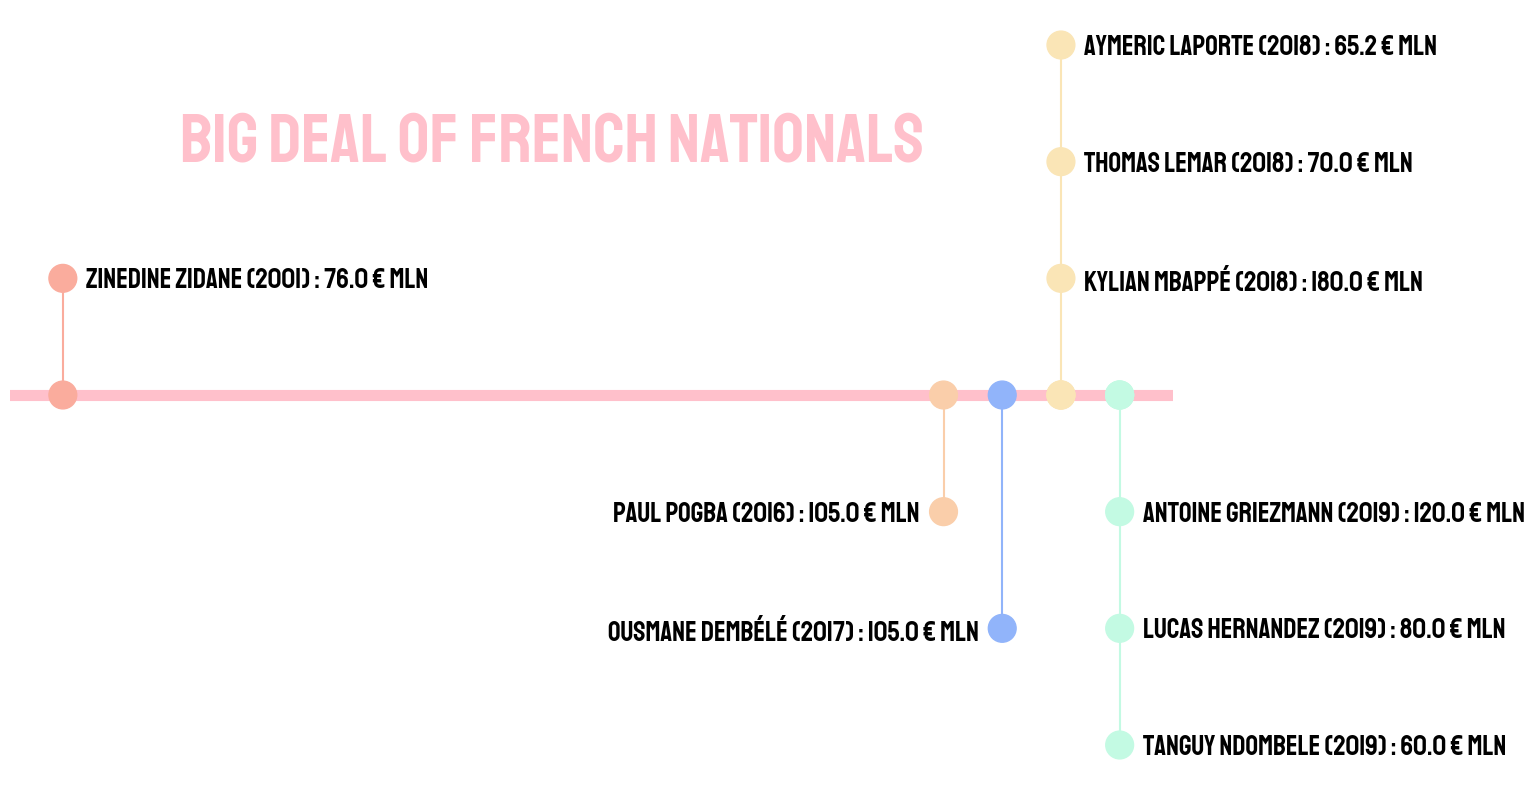

In [14]:
france = data[data['Origin'] =='France'].reset_index(drop=True)
fig = plt.figure(figsize=(15,10))
color = ['#FAE5B6','#C3FAE3','#FACEAA','#91B4FA','#C3FAE3','#FAAC9D','#FAE5B6','#FAE5B6','#C3FAE3']
plt.axhline(0,color='pink',lw=8,zorder=1)
plt.scatter(x=france['Year'], y=list([0]* 9),s=400,zorder=2,color = color)
plt.plot([2001,2001],[0,1],color = '#FAAC9D')
plt.plot([2016,2016],[0,-1],color = '#FACEAA')
plt.plot([2017,2017],[0,-2],color = '#91B4FA')
plt.plot([2018,2018],[0,3],color = '#FAE5B6')
plt.plot([2019,2019],[0,-3],color = '#C3FAE3')
color = ['#FAAC9D', '#FACEAA','#91B4FA','#FAE5B6','#FAE5B6','#FAE5B6','#C3FAE3','#C3FAE3','#C3FAE3']
plt.scatter([2001,2016,2017,2018,2018,2018,2019,2019,2019],[1,-1,-2,1,2,3,-1,-2,-3],s=400,color = color)
i = [5,2,3,0,6,7,1,4,8]
y = [1,-1,-2,1,2,3,-1,-2,-3]
position = ['left','right','right','left','left','left','left','left','left']
for j in range(9):
    if position[j] > 'left':
        x = france.loc[i[j],'Year'] -0.4
    else:
        x = france.loc[i[j],'Year'] +0.4
    plt.text(s=f"{france.loc[i[j],'Player']} ({france.loc[i[j],'Year']}) : {france.loc[i[j],'Fee_€ mln']} € mln" , x=x, y=y[j],font=font, fontsize=20,va='center',ha=position[j])
plt.text(s="Big Deal of French Nationals", x=2003, y=2, font=font, fontsize=50,color='pink')

plt.axis('off')
fig.show()

### Report

## Average Transfer Prices by Player Position

* Forwards: Command the highest average transfer fees, indicating premium value and market demand for goal-scoring capabilities.
* Midfielders: Follow with substantial transfer fees, reflecting their strategic importance in team playmaking and control.
* Defenders and Goalkeepers: Typically command lower transfer fees compared to forwards and midfielders due to their specialized roles in defensive play.

## Top Players in Each Position

* Notable players like Neymar exemplify high transfer fees in the forward position, underscoring their star status and market influence.
* Top players across midfield, defense, and goalkeeper positions highlight diverse talent valuation and market dynamics across different player roles.

## Clubs and Transfer Activities

* Acquisitions: Clubs such as Real Madrid and Manchester City lead in player acquisitions, leveraging financial strength and strategic recruitment to enhance team competitiveness.
* Sales: Clubs like Atletico Madrid, Borussia Dortmund, and Juventus excel in player sales, demonstrating their role as talent developers and profit generators in the football market.

## Origins of Expensive Players: National Contributions

* France: Emerges as a significant contributor to high-value player transfers, reflecting robust football development and export of top-tier talent to global markets.

## Visual Representation of Significant French Player Transfers

 Visualizations depict key transfer deals involving French nationals, providing historical context and illustrating impactful transactions that shape the football market landscape.

# Conclusion
This analysis provides actionable insights into the football transfer market, highlighting trends in player valuations, club strategies, and national contributions. By leveraging these insights, stakeholders can optimize player recruitment strategies, strengthen team competitiveness, and capitalize on emerging opportunities in the dynamic football industry.

## Recommendations
* Strategic Recruitment: Focus on positions like forwards and midfielders to maximize market value and on-field impact.
* Market Positioning: Leverage financial strength to acquire and develop talent that aligns with long-term team goals.
* National Talent Development: Invest in local youth development programs to cultivate future stars and enhance club sustainability.

# Next Steps
### Further analysis could include:
* Comparative analysis with historical data to track market trends over time.
* Player performance metrics correlated with transfer fees to assess value for money.
* Expansion of dataset to include additional leagues and regions for broader market insights.